### 학습목표
- 네이버 카페 url 패턴 분석하여 기간 설정값을 변경하여 데이터를 수집해보자~

- 실습순서
1. 네이버 카페 url 분석하기
2. 검색할 키워드와 기간설정값을 변수로 만든 후 url 적용하기
3. selenium 브라우저 띄우기
4. 스크롤 내리기
5. 조회된 카페 게시글 url 수집하여 리스트 저장
6. 리스트 내의 게시글 요청하여 데이터 수집
7. 전처리 후 텍스트파일에 저장

In [1]:
# 라이브러리 불러오기
import selenium.webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import pandas as pd
import re # 정규표현식

# 문자열 전처리 함수 -> 숫자, 문자, (?.!,¿) 제외하고 공백으로 대체
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) 
  w = w.strip() 
  return w

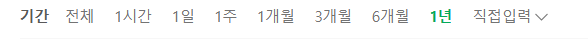

In [4]:
# 글(문자열 등) 데이터가 url 에 들어갔을때 띄어쓰기가 있으면 url 오류가 뜸
# url 에 글이 들어갔을떄 안전하게 사용할 수 있는 형태로 변경해주는 기능
from urllib.parse import quote
keyword = quote('음식물 처리기 사용 후기')
keyword

'%EC%9D%8C%EC%8B%9D%EB%AC%BC%20%EC%B2%98%EB%A6%AC%EA%B8%B0%20%EC%82%AC%EC%9A%A9%20%ED%9B%84%EA%B8%B0'

In [8]:
# date_option 패턴: 0(전체), 1(1시간),2(1일),3(1주),4(1개월),5(3개월),6(6개월), 7(1년)
date_option = 6
url = f'https://search.naver.com/search.naver?cafe_where=&date_option={date_option}&prdtype=0&query={keyword}&sm=mtb_opt&ssc=tab.cafe.all&st=rel&stnm=rel&opt_tab=0&nso=so%3Ar%2Cp%3A6m'
url

'https://search.naver.com/search.naver?cafe_where=&date_option=6&prdtype=0&query=%EC%9D%8C%EC%8B%9D%EB%AC%BC%20%EC%B2%98%EB%A6%AC%EA%B8%B0%20%EC%82%AC%EC%9A%A9%20%ED%9B%84%EA%B8%B0&sm=mtb_opt&ssc=tab.cafe.all&st=rel&stnm=rel&opt_tab=0&nso=so%3Ar%2Cp%3A6m'

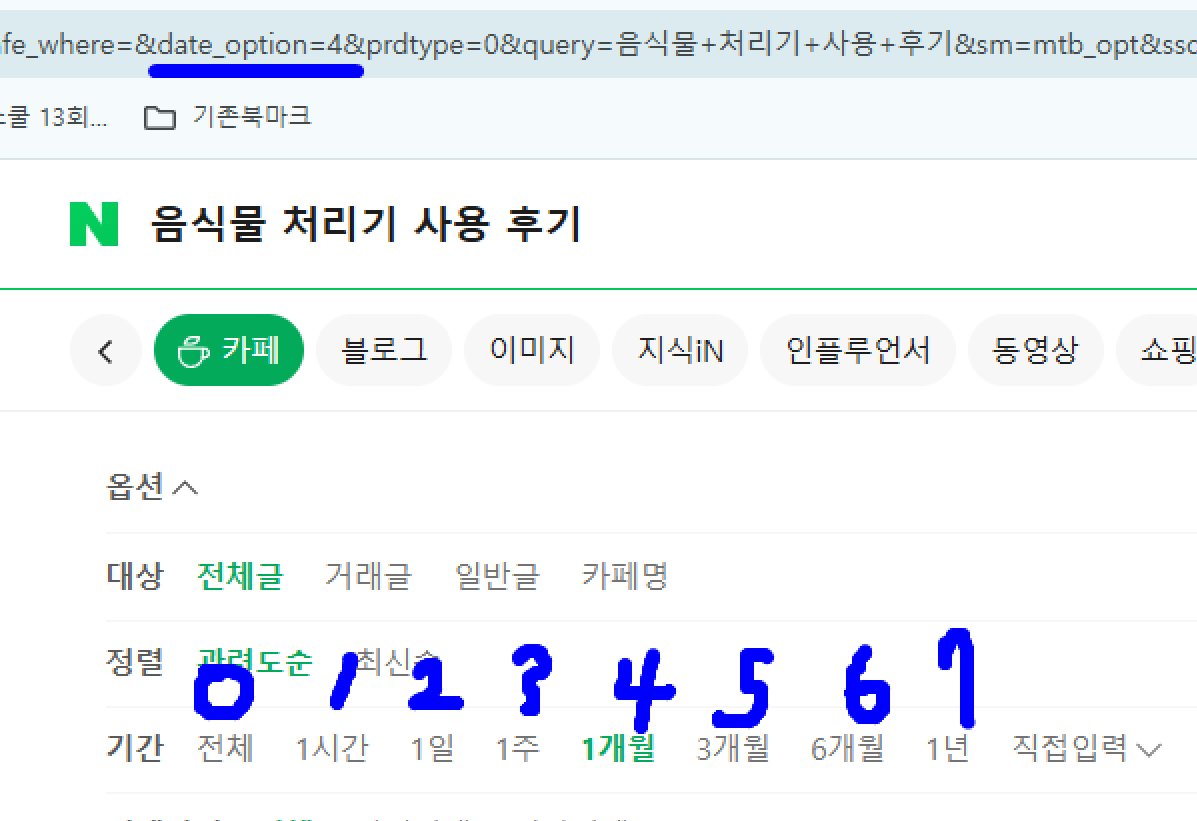

In [ ]:
# selenium 브라우저 띄우기
# 스크롤 내리기 (10번 내리기)
# 조회된 카페 게시글 url 수집하여 리스트 저장 (href_list)
# 리스트 내의 게시글 요청하여 데이터 수집
# 전처리 후 텍스트파일에 저장 .txt